# Math 387 Honours Numerical Analysis
## Lab assignment 1 Part 1
### Taylor Polynomials

In [1]:
#author: Gantumur Tsogtgerel, with help from Tuguldur Sukhbold
#Modified by Shenshun Yao; Student ID:260709204
import numpy as np
import matplotlib.pyplot as plt
import random as rn

We study the effect of inexact arithmetic on computation of the exponential series

$$
e^x = 1 + x + \frac{x^2}2 + \frac{x^3}{3!} + \ldots .
$$

which is approximated by the Taylor polynomial

$$
T_n(x) = 1 + x + \frac{x^2}2 + \ldots \frac{x^n}{n!} .
$$

Each term of the Taylor polynomial is computed with random error, 
uniformly distributed with relative amplitude $\varepsilon$.
We can think of $\varepsilon$ as modeling the machine precision.
A typical choice below is $\varepsilon=0.1$.
This of course greatly exaggaretes roundoff errors, but illustrates the phenomenon nicely.
In this setting, the built-in computation of $e^x$ can be taken as exact.


* $\texttt{expser}(n,x,\varepsilon)$ computes $T_n(x)$ with each of its term having random error, 
uniformly distributed with relative amplitude $\varepsilon$.
* $\texttt{expserlist}(n,xlist,\varepsilon)$ is a version of $\texttt{expser}(n,x,\varepsilon)$ that works with a list of $x$.
* The next 3 functions work with lists of $x$, $n$, and $\varepsilon$, respectively, 
but they all compute $e^x-T_n(x)$, where $T_n(x)$ has the aforementioned perturbation. 



In [2]:
def expser(n,x,eps=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for exp
# n - degree of the Taylor polynomial
# x - the argument
# eps - relative error in computation of the series terms, modeled by uniform noise
    b=1.
    y=b
    for i in range(1,n+1):
        b*=float(x)/i
        r=2*eps*rn.random()-eps
        y+=b*(1.+r)
    return y
#This method computes the T_n(x),

In [3]:
def expserlist(n,xlist,eps=0):
#works with *list* of x
    ylist = []
    for x in xlist:
        ylist.append(expser(n,x,eps))
    return ylist

In [4]:
def errxlist(n,xlist,eps):
#difference between Tn(x) and e^x
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

In [5]:
def errelist(n,x,elist):
#difference between Tn(x) and e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

In [6]:
def errnlist(nlist,x,eps):
#difference between Tn(x) and e^x
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

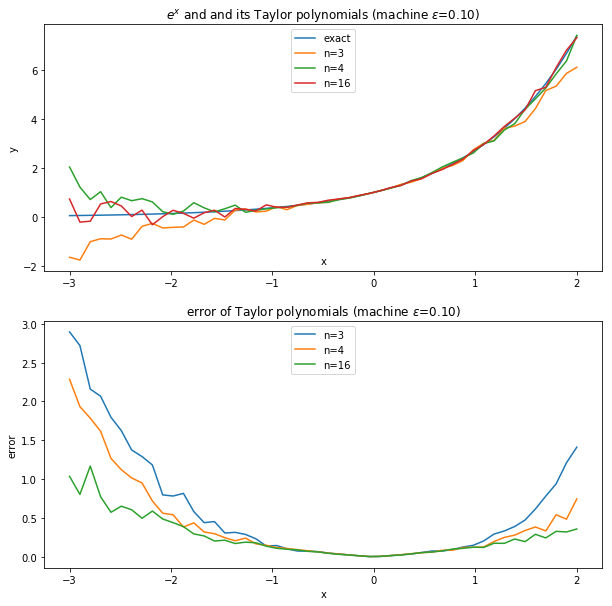

In [7]:
xlist = np.linspace(-3, 2, 50)
nlist = [3,4,16]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.exp(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,expserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(errxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(errxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax2.plot(xlist,y,label='n=%d'%n)

ax1.set_title(r'$e^x$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
plt.show()

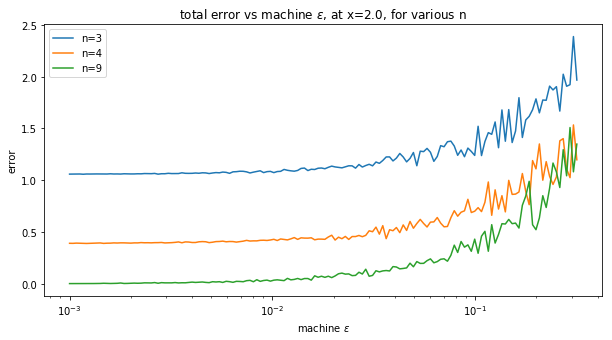

In [8]:
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(errelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(errelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'total error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

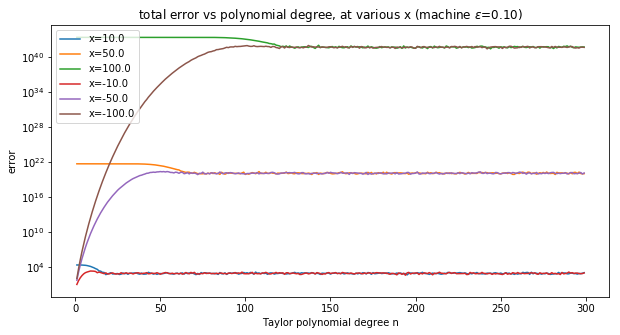

In [9]:
xlist = [10,50,100,-10,-50,-100]
nlist=range(1,300)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(errnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(errnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

## Problem 1: The thresholds of "error vs $n$" plot
From the "error vs $n$" plot, we can find this threshold only depends on $x$, such that the lower the $|x|$ is, the earlier the threshold appears. If two values have the same absoluate value, they will get almost similar thresholds. Also, the machine $\epsilon$ doesn't affect where will the threshold would appear.

Then we focus on some details, if x is a small negative number, then it will have the same trajectory with its absolute value.But if x is a large negative number, there would appear an incareasingly concave curves before it attains the threshold.

## Problem 2: The relative error of $e^{x}$
### We modify the code and study the relative error above. We then analyze the behavior by the codes and plots  below. 

In [10]:
def relerrxlist(n,xlist,eps):
#divide the difference between Tn(x) and e^x by e^x
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append((expser(n,x,eps)-np.exp(x))/(np.exp(x)))
    return yy

In [11]:
def relerrelist(n,x,elist):
#divide the difference between Tn(x) and e^x by e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append((expser(n,x,eps)-np.exp(x))/(np.exp(x)))
    return yy

In [12]:
def relerrnlist(nlist,x,eps):
#divide the difference between Tn(x) and e^x by e^x 
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append((expser(n,x,eps)-np.exp(x))/(np.exp(x)))
    return yy

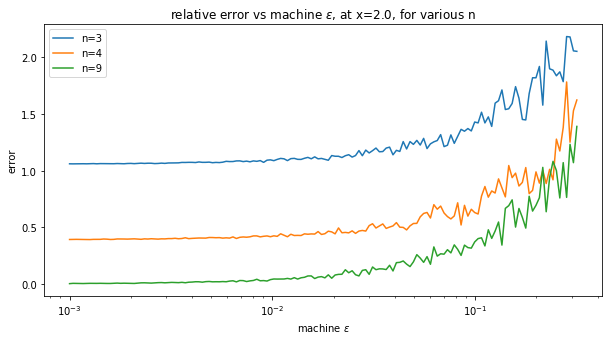

In [13]:
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(errelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(errelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'relative error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

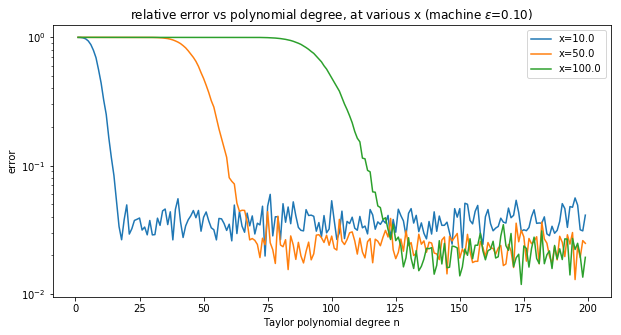

In [14]:
xlist = [10,50,100]
nlist=range(1,200)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(relerrnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(relerrnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'relative error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

First we find that the machine $\epsilon$ doesn't affect the behavior.

If $x$ are all positive number that we can say it holds the similar behavior with the total error, the only difference is that the fluctuation of relative error is much more obvious than the total error.

## Porblem 3: New transcendental function-cos(x)
We then study the effect of inexact arithmetic on computation of another transcendental function: cosine series.

$$
\cos(x) = 1 - \frac{x^2}{2!}+\frac{x^4}{4!}-\frac{x^6}{6!}+\cdots = \sum_{i=0}^{\infty} \frac{(-1)^{i}(x)^{2i}}{(2n)!},
$$

which is approximated by the Taylor polynomial

$$
T_n(x) = \sum_{i=0}^{n} \frac{(-1)^{i}(x)^{2i}}{(2n)!} .
$$
Each term of the Taylor polynomial is computed with random error, 
uniformly distributed with relative amplitude $\varepsilon$.
We can think of $\varepsilon$ as modeling the machine precision.
A typical choice below is $\varepsilon=0.1$.
This of course greatly exaggaretes roundoff errors, but illustrates the phenomenon nicely.
In this setting, the built-in computation of $e^x$ can be taken as exact.


* $\texttt{coser}(n,x,\varepsilon)$ computes $T_n(x)$ with each of its term having random error, 
uniformly distributed with relative amplitude $\varepsilon$.
* $\texttt{coserlist}(n,xlist,\varepsilon)$ is a version of $\texttt{cosser}(n,x,\varepsilon)$ that works with a list of $x$.
* The next 3 functions work with lists of $x$, $n$, and $\varepsilon$, respectively, 
but they all compute $\cos(x)-T_n(x)$, where $T_n(x)$ has the aforementioned perturbation. 


In [15]:
def coser(n,x,eps=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for cosx
# n - degree of the Taylor polynomial
# x - the argument
# eps - relative error in computation of the series terms, modeled by uniform noise
    b=1.
    y=b
    for i in range(1,n+1):
        b*=float(((-1)**i)*x**2)/(2*i*(2*i-1))
        r=2*eps*rn.random()-eps
        y+=b*(1.+r)
    return y
#This method computes the T_n(x),

In [16]:
def coserlist(n,xlist,eps=0):
#works with *list* of x
    ylist = []
    for x in xlist:
        ylist.append(coser(n,x,eps))
    return ylist

In [17]:
def errxlist(n,xlist,eps):
#difference between Tn(x) and cos(x)
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(coser(n,x,eps)-np.cos(x))
    return yy

In [18]:
def errelist(n,x,elist):
#difference between Tn(x) and cos(x)
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(coser(n,x,eps)-np.cos(x))
    return yy

In [19]:
def errnlist(nlist,x,eps):
#difference between Tn(x) and cos(x)
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(coser(n,x,eps)-np.cos(x))
    return yy

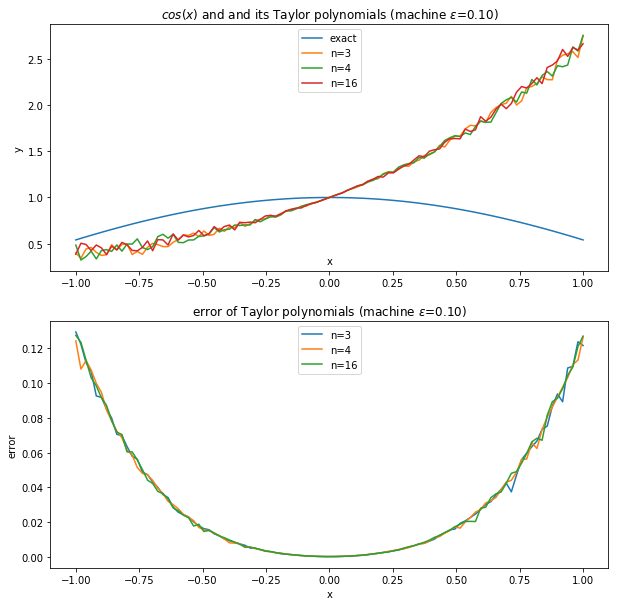

In [20]:
xlist = np.linspace(-1, 1, 100)
nlist = [3,4,16]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.cos(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,expserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(errxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(errxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax2.plot(xlist,y,label='n=%d'%n)

ax1.set_title(r'$cos(x)$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
plt.show()

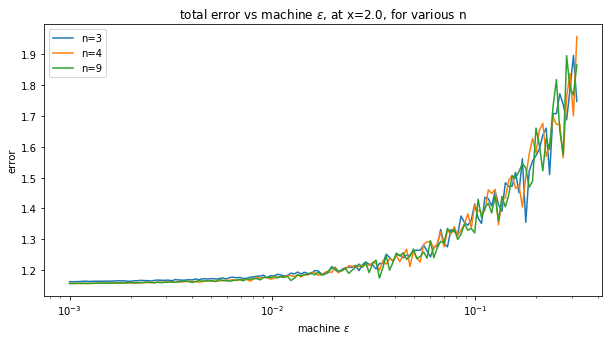

In [21]:
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(errelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(errelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'total error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

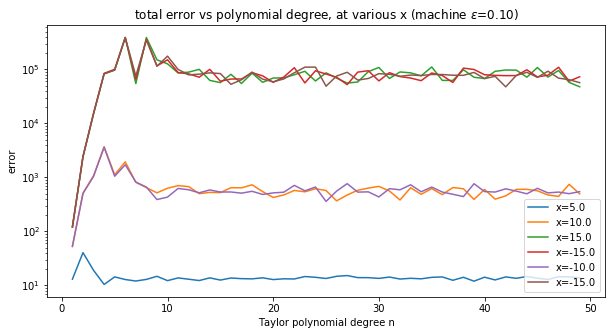

In [22]:
xlist = [5,10,15,-15,-10,-15]
nlist=range(1,50)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(errnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(errnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

From the "error vs $n$" plot, we can find this threshold only depends on $x$, such that the lower the $x$ is, the earlier the threshold appears. If two values have the same absoluate value , they will get almost the similar thresholds and trajectories although the fluctuation might be different, note that the error will firstly increase and then tend to be steady after it attains the threshold. Also, the machine $\epsilon$ doesn't affect where will the threshold would appear.


### We modify the code and study the relative error of above. We then analyze the behavior by the codes and plots  below.

In [23]:
def relerrxlist(n,xlist,eps):
#divide the difference between Tn(x) and cos(x) by cos(X)
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append((coser(n,x,eps)-np.cos(x))/(np.cos(x)))
    return yy

In [24]:
def relerrelist(n,x,elist):
#divide the difference between Tn(x) and cos(x) by cos(x)
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append((coser(n,x,eps)-np.cos(x))/(np.cos(x)))
    return yy

In [25]:
def relerrnlist(nlist,x,eps):
#divide the difference between Tn(x) and cos(x) by cos(X) 
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append((coser(n,x,eps)-np.cos(x))/(np.cos(x)))
    return yy

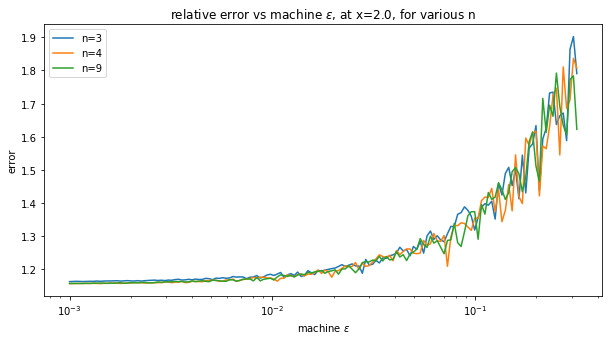

In [26]:
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(errelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(errelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'relative error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

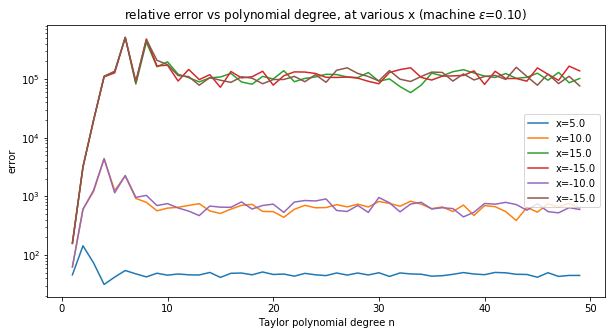

In [27]:
xlist = [5,10,15,-15,-10,-15]
nlist=range(1,50)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(relerrnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(relerrnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'relative error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

The behavior of the relative error of $\cos(x)$ is alomost similar with its total error.